In [54]:
#Data source: https://mappingpoliceviolence.org/aboutthedata 
#23/07/2020
import pandas as pd
df = pd.read_excel('MPVDatasetDownload.xlsx')
df

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Symptoms of mental illness?,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),ID
0,Kevin Lee Catlett,62,Male,Unknown race,NaN,2020-06-30,900 McArthur Street,Johnson City,TN,37601.0,...,Drug or alcohol use,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN,NaN,NaN
1,Wade Russell Meisberger,48,Male,White,https://fatalencounters.org/wp-content/uploads...,2020-06-29,West Beech St and South Church St,Hazleton,PA,18201.0,...,No,Allegedly Armed,gun,attack,Car,No,5958.0,NaN,NaN,NaN
2,Nick Costales,34,Male,Hispanic,https://fatalencounters.org/wp-content/uploads...,2020-06-29,9501 Monte Vista Ave,Montclair,CA,91763.0,...,No,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN,NaN,NaN
3,Brittany S. Teichroeb,26,Female,White,NaN,2020-06-29,TX-191 and TX-250 Loop,Midland,TX,79706.0,...,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,John Parks,57,Male,White,https://fatalencounters.org/wp-content/uploads...,2020-06-29,Court Avenue and Audubon Drive,Paducah,KY,42001.0,...,No,Unclear,undetermined,undetermined,Car,No,5953.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8258,Tyree Bell,31,Male,Black,http://content.omaha.com/media/maps/ps/2013/ja...,2013-01-01,3727 N. 42nd St.,Omaha,NE,68111.0,...,Yes,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Urban,2.0
8259,Abel Gurrola,26,Male,Hispanic,http://www.bakersfieldnow.com/news/local/A-26-...,2013-01-01,720 Terrace Way,Bakersfield,CA,93304.0,...,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Urban,3.0
8260,Christopher Tavares,21,Male,Hispanic,http://www.krdo.com/image/view/-/17980228/medR...,2013-01-01,Highway 50 and North Elizabeth Street,Pueblo,CO,81008.0,...,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Suburban,4.0
8261,Andrew L. Closson,21,Male,White,http://www.superiortelegram.com/sites/default/...,2013-01-01,U.S. Highway 53,Gordon,WI,54838.0,...,Drug or alcohol use,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Rural,5.0


In [35]:
#Select specific columns
#df.columns
dfrace = df[['Victim\'s race']]
#dfrace

dfdate = df[['Victim\'s race','Date of Incident (month/day/year)']]
#dfdate

,Victim's race,Date of Incident (month/day/year)
0,Unknown race,2020-06-30
1,White,2020-06-29
2,Hispanic,2020-06-29
3,White,2020-06-29
4,White,2020-06-29
...,...,...
8258,Black,2013-01-01
8259,Hispanic,2013-01-01
8260,Hispanic,2013-01-01
8261,White,2013-01-01


In [167]:
Race = list(df['Victim\'s race'])
Date = list(df['Date of Incident (month/day/year)'])
Year = list(pd.DatetimeIndex(df['Date of Incident (month/day/year)']).year)
dfs = pd.DataFrame({'Race': Race,
                  'Date': Date,
                  'Year': Year})
dfs

,Race,Date,Year
0,Unknown race,2020-06-30,2020
1,White,2020-06-29,2020
2,Hispanic,2020-06-29,2020
3,White,2020-06-29,2020
4,White,2020-06-29,2020
...,...,...,...
8258,Black,2013-01-01,2013
8259,Hispanic,2013-01-01,2013
8260,Hispanic,2013-01-01,2013
8261,White,2013-01-01,2013


In [171]:
#There's a problem with "Unknown race": sometimes it's "Unknown Race". 
#That will cause problems with our grouping so let's fix that.
for i, row in dfs.iterrows():
    ifor_val = 'Unkown race'
    if dfs.at[i, 'Race'] == 'Unknown Race':
        ifor_val = dfs.at[i, 'Race'].replace('Race','race')
        dfs.at[i, 'Race'] = ifor_val
dfs

,Race,Date,Year
0,Unknown race,2020-06-30,2020
1,White,2020-06-29,2020
2,Hispanic,2020-06-29,2020
3,White,2020-06-29,2020
4,White,2020-06-29,2020
...,...,...,...
8258,Black,2013-01-01,2013
8259,Hispanic,2013-01-01,2013
8260,Hispanic,2013-01-01,2013
8261,White,2013-01-01,2013


In [172]:
#Group data by race
#df[['col1', 'col2', 'col3', 'col4']].groupby(['col1', 'col2']).agg(['mean', 'count'])
gr = dfs.groupby(dfs['Race'])
gr

#Group data by date
gd = dfs.groupby(dfs['Date'])
gd

In [241]:
#Kills by race (2013-2020)
dfdr= gr.count()
dfdr = dfdr.rename(columns={'Year': 'Victims'}) #Rename columns
dfdr = dfdr['Victims']
pd.DataFrame(dfdr)

,Victims
Race,
Asian,128
Black,2075
Hispanic,1418
Native American,117
Pacific Islander,46
Unknown race,865
White,3614


In [266]:
#This is what we want: Deaths by race by year
gy = pd.DataFrame(dfs.groupby(['Year','Race'])['Race'].count())
gy = gy.rename(columns={'Race': 'Victims'}) #Rename columns
gy

Victims
Year Race                     
2013 Asian                  18
     Black                 291
     Hispanic              170
     Native American         4
     Pacific Islander        2
     Unknown race          195
     White                 426
2014 Asian                  16
     Black                 277
     Hispanic              182
     Native American        10
     Pacific Islander        5
     Unknown race           85
     White                 475
2015 Asian                  29
     Black                 305
     Hispanic              195
     Native American        13
     Pacific Islander        4
     Unknown race           13
     White                 544
2016 Asian                  14
     Black                 279
     Hispanic              194
     Native American        23
     Pacific Islander        6
     Unknown race           23
     White                 532
2017 Asian                  12
     Black                 276
     Hispanic              225
     Native American        28
     Pacific Islander        6
     Unknown race           41
     White                 505
2018 Asian                  12
     Black                 257
     Hispanic              187
     Native American        21
     Pacific Islander       10
     Unknown race          165
     White                 490
2019 Asian                  17
     Black                 260
     Hispanic              182
     Native American        13
     Pacific Islander        9
     Unknown race          212
     White                 407
2020 Asian                  10
     Black                 130
     Hispanic               83
     Native American         5
     Pacific Islander        4
     Unknown race          131
     White                 235

In [402]:
#Resize
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize']= (20,10)
#plt.rcParams['font.size']= 12
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 15,
         'axes.titlesize':40,
          'font.size': 10,
         'xtick.labelsize':15,
         'ytick.labelsize':15}
plt.rcParams.update(params)

Text(0, 0.5, 'Deaths')

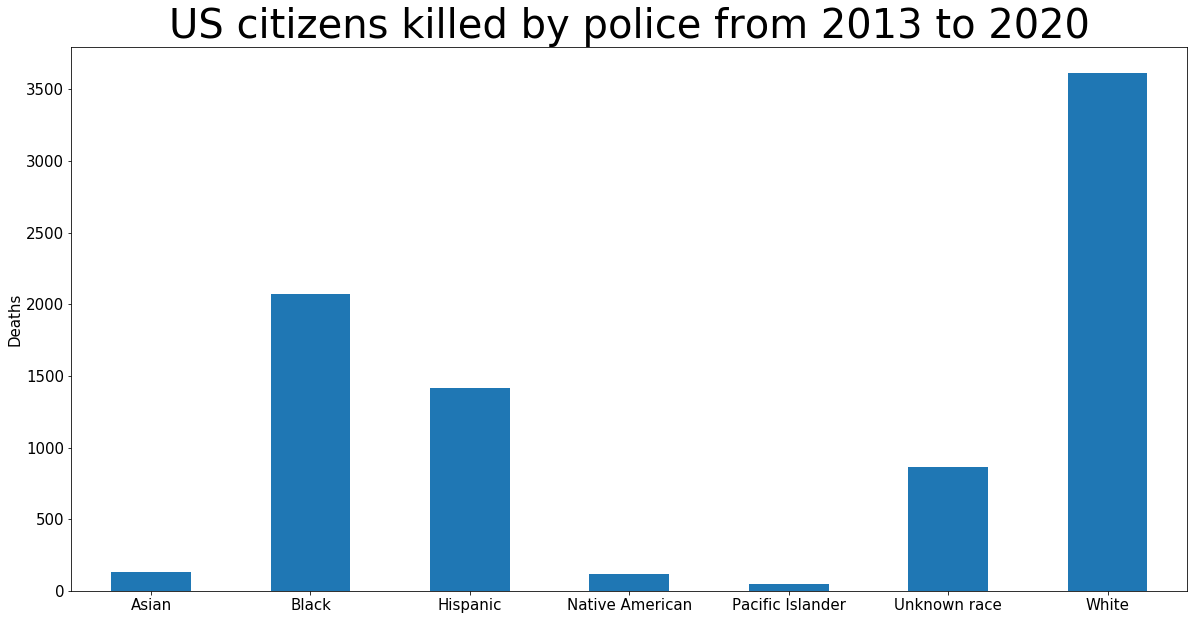

In [412]:
#Let's plot deaths from 2013 to 2020
ax = dfdr.plot.bar(rot=0, title = 'US citizens killed by police from 2013 to 2020')
#ax.title.set_size(40)
ax.set_xlabel("")
ax.set_ylabel("Deaths")

In [284]:
#Get population for each year
#Source: https://www.kff.org/other/state-indicator/distribution-by-raceethnicity/
df2013 = pd.read_excel('population-2013.xlsx')
#df2013.set_index([pd.Index([2013])]) #In case we want to use the year as an Index
year = 2013
df2013['Year'] = year

df2014 = pd.read_excel('population-2014.xlsx')
year = 2014
df2014['Year'] = year

df2015 = pd.read_excel('population-2015.xlsx')
year = 2015
df2015['Year'] = year

df2016 = pd.read_excel('population-2016.xlsx')
year = 2016
df2016['Year'] = year

df2017 = pd.read_excel('population-2017.xlsx')
year = 2017
df2017['Year'] = year

df2018 = pd.read_excel('population-2018.xlsx')
#df2018.set_index([pd.Index([2018])])
year = 2018
df2018['Year'] = year

In [285]:
#Union all for the population
dfPopulation = pd.concat([df2013, df2014, df2015, df2016, df2017, df2018])
dfPopulation = pd.DataFrame(dfPopulation)
dfPopulation

,Location,White,Black,Hispanic,American Indian/Alaska Native,Asian,Native Hawaiian/Other Pacific Islander,Two Or More Races,Total,Year
0,United States,192379500,37122600,52764900,2008700,15505700,448800,7275400,307505500,2013
0,United States,192419600,37599400,54059600,2006500,16156500,481900,7488800,310212200,2014
0,United States,192593600,37923800,55241300,1986900,16755300,466400,7810600,312777900,2015
0,United States,192537500,38081700,56144400,2041500,17004500,514600,8142200,314466400,2016
0,United States,192336100,38408000,57560600,2039400,17651200,502500,8524700,317022500,2017
0,United States,192117000,38655700,58483600,2082800,17844800,519500,8795000,318498500,2018


In [286]:
#We need this in another structure so we can join with our current tables. Time to melt.
dfmelt = pd.melt(dfPopulation,['Year'])
dfmelt

,Year,variable,value
0,2013,Location,United States
1,2014,Location,United States
2,2015,Location,United States
3,2016,Location,United States
4,2017,Location,United States
5,2018,Location,United States
6,2013,White,192379500
7,2014,White,192419600
8,2015,White,192593600
9,2016,White,192537500


In [287]:
#Let's start cleaning everything. 

#Totals table
dfTotal = dfmelt[dfmelt['variable']=='Total'].reset_index() #Reset index 
dfTotal = dfTotal.rename(columns={'value': 'Total Population'}) #Rename columns
dfTotal = dfTotal[['Year','Total Population']] #Select just the columns we want

#Race table
dfRace = dfmelt[(dfmelt['variable']!='Total') & (dfmelt['variable']!='Location')]
dfRace = dfRace.rename(columns={'variable': 'Race','value': 'Population'}) #Rename columns

dfTotal

,Year,Total Population
0,2013,307505500
1,2014,310212200
2,2015,312777900
3,2016,314466400
4,2017,317022500
5,2018,318498500


In [297]:
#We'll have to rename everything accordingly. 
#I don't think I'm mapping this right, because "Unkown Race" might fall arbitrarily under different categories.
#I might leave these 3 out of the analysis, but I'll do this exercise anyway.

#"American Indian/Alaska Native" to "Native American"
for i, row in dfRace.iterrows():
    ifor_val = 'Native American'
    if dfRace.at[i, 'Race'] == 'American Indian/Alaska Native':
        ifor_val = dfRace.at[i, 'Race'].replace('American Indian/Alaska Native','Native American')
        dfRace.at[i, 'Race'] = ifor_val

#"Native Hawaiian/Other Pacific Islander" to "Pacific Islander"
for i, row in dfRace.iterrows():
    ifor_val = 'Pacific Islander'
    if dfRace.at[i, 'Race'] == 'Native Hawaiian/Other Pacific Islander':
        ifor_val = dfRace.at[i, 'Race'].replace('Native Hawaiian/Other Pacific Islander','Pacific Islander')
        dfRace.at[i, 'Race'] = ifor_val
        
#"Two Or More Races" to "Unknown race"
for i, row in dfRace.iterrows():
    ifor_val = 'Unknown race'
    if dfRace.at[i, 'Race'] == 'Two Or More Races':
        ifor_val = dfRace.at[i, 'Race'].replace('Two Or More Races','Unknown race')
        dfRace.at[i, 'Race'] = ifor_val   
        
dfRace

,Year,Race,Population
6,2013,White,192379500
7,2014,White,192419600
8,2015,White,192593600
9,2016,White,192537500
10,2017,White,192336100
11,2018,White,192117000
12,2013,Black,37122600
13,2014,Black,37599400
14,2015,Black,37923800
15,2016,Black,38081700


In [355]:
#Merge with total population

dfPopulation = dfRace.merge(dfTotal, left_on='Year', right_on='Year')

#And turn the population to int32, because they're objects
dfPopulation['Population'] = dfPopulation['Population'].astype(int)
dfPopulation['Total Population'] = dfPopulation['Total Population'].astype(int)

dfPopulation

,Year,Race,Population,Total Population
0,2013,White,192379500,307505500
1,2013,Black,37122600,307505500
2,2013,Hispanic,52764900,307505500
3,2013,Native American,2008700,307505500
4,2013,Asian,15505700,307505500
5,2013,Pacific Islander,448800,307505500
6,2013,Unknown race,7275400,307505500
7,2014,White,192419600,310212200
8,2014,Black,37599400,310212200
9,2014,Hispanic,54059600,310212200


In [349]:
#We reset the index of gy so we can merge and calculate the rate
#I don't know if there's a more efficient way of resetting indexes
#gy.reset_index(level=0, inplace=True)
#gy.reset_index(level=0, inplace=True)
gy

,level_0,index,Race,Year,Victims
0,0,0,Asian,2013,18
1,1,1,Black,2013,291
2,2,2,Hispanic,2013,170
3,3,3,Native American,2013,4
4,4,4,Pacific Islander,2013,2
5,5,5,Unknown race,2013,195
6,6,6,White,2013,426
7,7,7,Asian,2014,16
8,8,8,Black,2014,277
9,9,9,Hispanic,2014,182


In [358]:
#Now, let's merge

dfEverything = dfPopulation.merge(gy, left_on=['Year', 'Race'], right_on=['Year', 'Race'])

#We'll limit this analysis to white, black, hispanic and asian races, since we can't be sure about the others' demographics
dfEverything = dfEverything[(dfEverything['Race']=='White') | (dfEverything['Race']=='Black') | (dfEverything['Race']=='Hispanic') | (dfEverything['Race']=='Asian')]

#Select only the columns we're interested in and order them appropiately
dfEverything = dfEverything[['Race','Year','Victims','Population','Total Population']]
dfEverything

,Race,Year,Victims,Population,Total Population
0,White,2013,426,192379500,307505500
1,Black,2013,291,37122600,307505500
2,Hispanic,2013,170,52764900,307505500
4,Asian,2013,18,15505700,307505500
7,White,2014,475,192419600,310212200
8,Black,2014,277,37599400,310212200
9,Hispanic,2014,182,54059600,310212200
11,Asian,2014,16,16156500,310212200
14,White,2015,544,192593600,312777900
15,Black,2015,305,37923800,312777900


In [373]:
#Rate per 1,000,000
dfEverything['Rate per race'] = (dfEverything['Victims'] / dfEverything['Population'])*1000000
dfEverything = dfEverything.round(2)
dfEverything

#Rate per US population
#dfEverything['Rate US population'] = dfEverything['Victims'] / dfEverything['Total Population']
#dfEverything.round({'Rate per race': 2, 'Rate US population': 2})
#dfEverything.round(decimals=2)
#dfEverything

,Race,Year,Victims,Population,Total Population,Rate per race
0,White,2013,426,192379500,307505500,2.21
1,Black,2013,291,37122600,307505500,7.84
2,Hispanic,2013,170,52764900,307505500,3.22
4,Asian,2013,18,15505700,307505500,1.16
7,White,2014,475,192419600,310212200,2.47
8,Black,2014,277,37599400,310212200,7.37
9,Hispanic,2014,182,54059600,310212200,3.37
11,Asian,2014,16,16156500,310212200,0.99
14,White,2015,544,192593600,312777900,2.82
15,Black,2015,305,37923800,312777900,8.04


In [377]:
#We'll just compare White and Black 
dfEverything = dfEverything[(dfEverything['Race']=='White') | (dfEverything['Race']=='Black')]
dfEverything

,Race,Year,Victims,Population,Total Population,Rate per race
0,White,2013,426,192379500,307505500,2.21
1,Black,2013,291,37122600,307505500,7.84
7,White,2014,475,192419600,310212200,2.47
8,Black,2014,277,37599400,310212200,7.37
14,White,2015,544,192593600,312777900,2.82
15,Black,2015,305,37923800,312777900,8.04
21,White,2016,532,192537500,314466400,2.76
22,Black,2016,279,38081700,314466400,7.33
28,White,2017,505,192336100,317022500,2.63
29,Black,2017,276,38408000,317022500,7.19


In [383]:
#For a proper bar chart we only need the rates
dfRates = dfEverything[['Year','Race', 'Rate per race']]
dfRates

,Year,Race,Rate per race
0,2013,White,2.21
1,2013,Black,7.84
7,2014,White,2.47
8,2014,Black,7.37
14,2015,White,2.82
15,2015,Black,8.04
21,2016,White,2.76
22,2016,Black,7.33
28,2017,White,2.63
29,2017,Black,7.19


In [384]:
#Let's reshape this so we can plot it.
dfRates = dfRates.pivot('Year', 'Race', 'Rate per race')
dfRates

Race,Black,White
Year,,
2013,7.84,2.21
2014,7.37,2.47
2015,8.04,2.82
2016,7.33,2.76
2017,7.19,2.63
2018,6.65,2.55


'US citizens killed by police per 1,000,000 population'

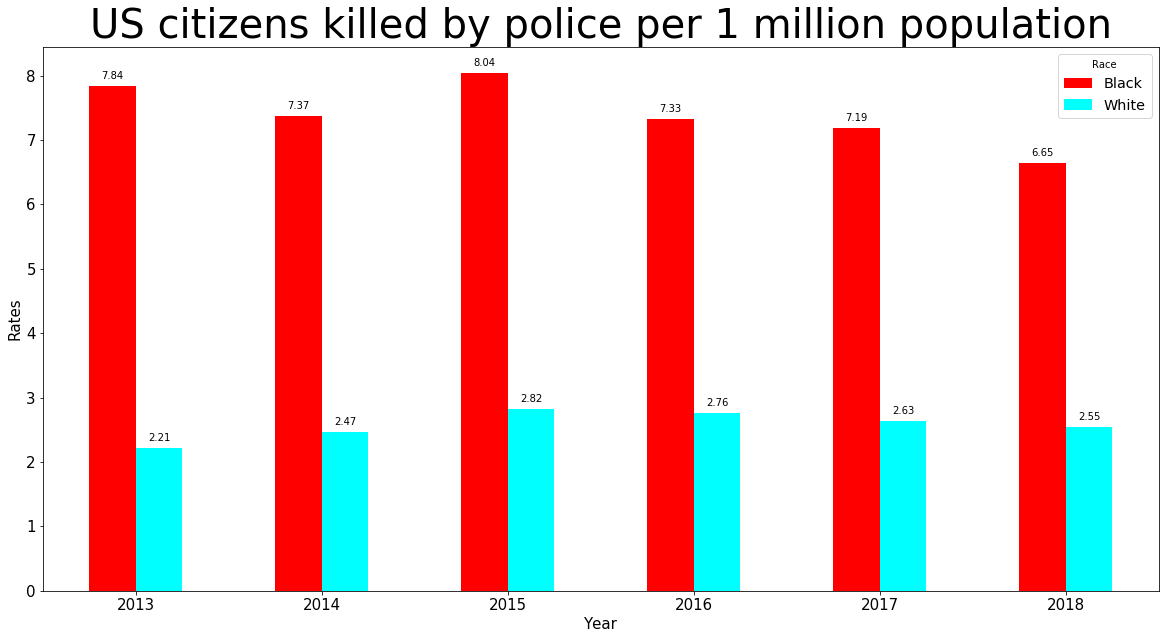

In [411]:
#Finally, let's get our plot
ax = dfRates.plot.bar(rot=0, title = "US citizens killed by police per 1 million population", color=['red', 'cyan'])

#Put the rates on top of the bars    
for p in ax.patches:                 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.set_ylabel("Rates")
